# Tarea KMeans&Shap
### Laboratorio de Aprendizaje Estadístico

José Armando Melchor Soto  | 745697

--- 




### Librerías: 

In [159]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.formula.api as smf
import warnings
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
import xgboost as xgb 
from xgboost import  XGBRegressor, XGBClassifier, plot_importance as xgb_plot_importance, callback as xgb_callback
from catboost import CatBoostRegressor, CatBoostClassifier
import lightgbm as lgb
from lightgbm import LGBMRegressor,LGBMClassifier, plot_importance,early_stopping, log_evaluation
import shap 
import shap.plots
from sklearn.cluster import KMeans

warnings.simplefilter(action='ignore', category=FutureWarning)

colors = ["cornflowerblue", "indianred", "darkseagreen", "plum", "dimgray"]

---

### Dataset : 
Titanic

In [160]:
df = pd.read_csv('titanic.csv')

In [161]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Dummies

In [162]:
df = pd.get_dummies(df, drop_first=True)
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,5,0,3,35.0,0,0,8.0500,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,False,False,False,...,False,False,False,False,False,False,False,False,False,True
887,888,1,1,19.0,0,0,30.0000,False,False,False,...,False,False,False,False,False,False,False,False,False,True
888,889,0,3,NaN,1,2,23.4500,False,False,False,...,False,False,False,False,False,False,False,False,False,True
889,890,1,1,26.0,0,0,30.0000,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Visualización del Dataset

In [163]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,5,0,3,35.0,0,0,8.0500,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [164]:
print(df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Name_Abbott, Mr. Rossmore Edward',
       'Name_Abbott, Mrs. Stanton (Rosa Hunt)', 'Name_Abelson, Mr. Samuel',
       ...
       'Cabin_F G63', 'Cabin_F G73', 'Cabin_F2', 'Cabin_F33', 'Cabin_F38',
       'Cabin_F4', 'Cabin_G6', 'Cabin_T', 'Embarked_Q', 'Embarked_S'],
      dtype='object', length=1726)


### **Modelo**

##### La variable a predecir: Survived

Se pide que el modelo tenga: 

test set: 20%
random_state: 42

In [165]:
target= 'Survived'
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

---

### NaN's

In [166]:
pd.DataFrame(df.isnull().sum()).T

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,0,0,0,177,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [167]:
df['Age'] = df['Age'].fillna(df['Age'].median())

Age es la que más NaN's tiene así que tratamos de eliminar eso, sacando la mediana.

In [168]:
pd.DataFrame(df.isnull().sum()).T

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


---

### Funciones 

##### Función XGBoost

In [169]:
def xgboost(X_train, y_train, X_test, y_test):
    model_xgboost = XGBClassifier(
        n_estimators=1000,
        max_depth=5,
        learning_rate=0.1,
        reg_lambda=0.1,
        subsample=0.5,
        colsample_bytree=0.8,
        tree_method='hist',
        enable_categorical=True,
        use_label_encoder=False,
        eval_metric='auc'
    )
    model_xgboost.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=100)
    proba_xgboost = model_xgboost.predict_proba(X_test)[:, 1]

    auc_score = roc_auc_score(y_test, proba_xgboost)
   
    fpr, tpr, _ = roc_curve(y_test, proba_xgboost)
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label=f'XGBoost (AUC = {auc_score:.3f})')
    plt.plot([0, 1], [0, 1], 'r--', label='Clasificador aleatorio')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC - XGBoost')
    plt.legend()
    plt.grid(True)
    plt.show()

    juntar = pd.DataFrame({
        'real': y_test,
        'probabilidades': proba_xgboost
    })

    plt.figure(figsize=(10, 5))
    plt.hist(juntar[juntar.real == 1]['probabilidades'], density=True, alpha=0.5, label='1')
    plt.hist(juntar[juntar.real == 0]['probabilidades'], density=True, alpha=0.5, label='0')
    plt.title('Histograma de probabilidades XGBoost')
    plt.xlabel('Probabilidad')
    plt.ylabel('Densidad')
    plt.legend()
    plt.grid(True)
    plt.show()


    importancia = pd.DataFrame({
        'variables': X_train.columns,
        'importancia': model_xgboost.feature_importances_
    })
    importancia.sort_values('importancia', ascending=True, inplace=True)
    importancia0 = importancia.tail(5)
    importancia0.plot.barh(x='variables', y='importancia', figsize=(8,6))
    plt.xlabel('Importancia')
    plt.title('Top 5 Feature Importances')
    plt.grid(True)
    plt.show()
    
    print("AUC XGBoost:", auc_score)




##### Función XGBoost Shap values

In [170]:
def shapXGB(X_train, y_train, X_test, y_test):

    model_xgboost = XGBClassifier(
        n_estimators=1000,
        max_depth=5,
        learning_rate=0.1,
        reg_lambda=0.1,
        subsample=0.5,
        colsample_bytree=0.8,
        tree_method='hist',
        enable_categorical=True,
        use_label_encoder=False,
        eval_metric='auc'
    )
    model_xgboost.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=100)

    proba_xgboost = model_xgboost.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, proba_xgboost)
    print(f"AUC XGBoost: {auc_score:.4f}")

    sample_size = min(10000, len(X_test))
    X_shap = X_test.sample(sample_size, random_state=42)

    explainer = shap.TreeExplainer(model_xgboost)
    shap_values = explainer.shap_values(X_shap)

    shap.initjs()

    shap.waterfall_plot(shap.Explanation(
        values=shap_values[0],
        base_values=explainer.expected_value,
        data=X_shap.iloc[0],
        feature_names=X_shap.columns
    ))

    plt.title('Top 5 Variables más importantes (Barplot)')
    shap.summary_plot(shap_values, X_shap, plot_type="bar", max_display=5)

    plt.title('Top 10 Variables con mayor impacto (Dotplot)')
    shap.summary_plot(shap_values, X_shap, plot_type="dot", max_display=10)


##### Función KMeans

In [171]:
def kmeans(df, columnas, max_clusters=10):

    X= df[columnas].values

    inertias = []
    
    for k in range(1, max_clusters + 1):
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('kmeans', KMeans(n_clusters=k, random_state=42))
        ])
        pipeline.fit(X)
        inertia = pipeline.named_steps['kmeans'].inertia_
        inertias.append(inertia)

    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_clusters + 1), inertias, marker='o')
    plt.xlabel('Clusters')
    plt.ylabel('Loss Function')
    plt.title('Método del Codo')
    plt.grid(True)
    plt.show()


### Correlación

In [172]:
df.corr()['Survived'].sort_values(ascending=False).head()

Survived         1.000000
Fare             0.257307
Cabin_B96 B98    0.085083
Ticket_113760    0.085083
Ticket_2666      0.085083
Name: Survived, dtype: float64

---

## **Modelos**

### XGBoost

[0]	validation_0-auc:0.64638


c:\Users\ppmel\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:48:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[100]	validation_0-auc:0.82688
[200]	validation_0-auc:0.80132
[300]	validation_0-auc:0.79499
[400]	validation_0-auc:0.79921
[500]	validation_0-auc:0.79592
[600]	validation_0-auc:0.79513
[700]	validation_0-auc:0.78959
[800]	validation_0-auc:0.79552
[900]	validation_0-auc:0.79921
[999]	validation_0-auc:0.80158


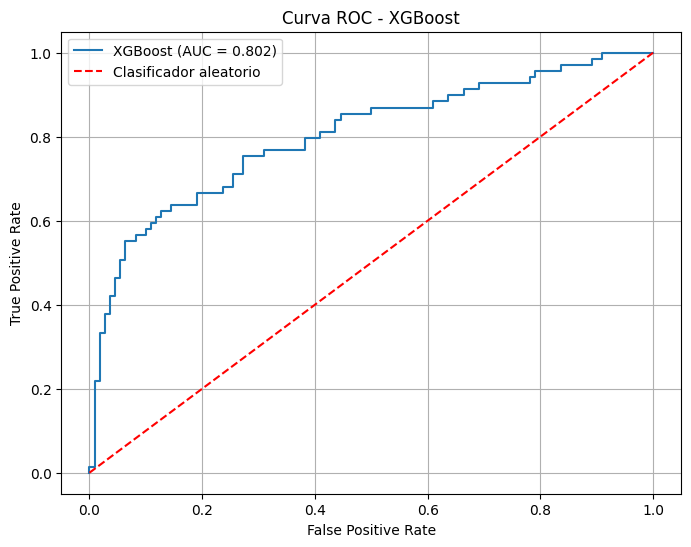

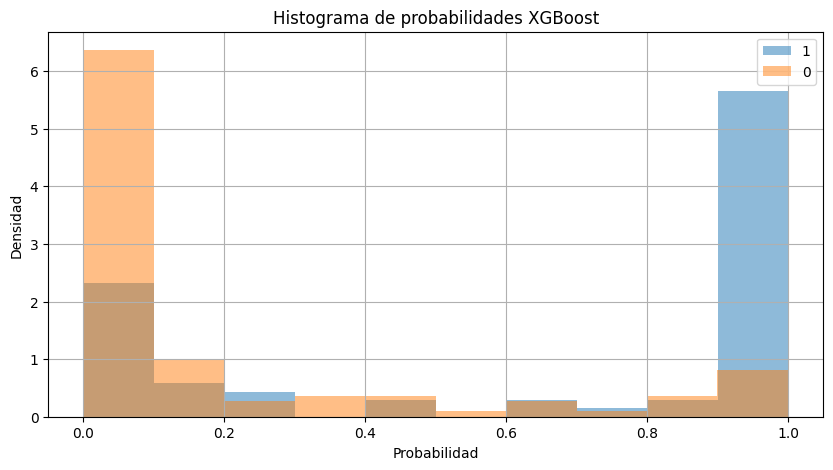

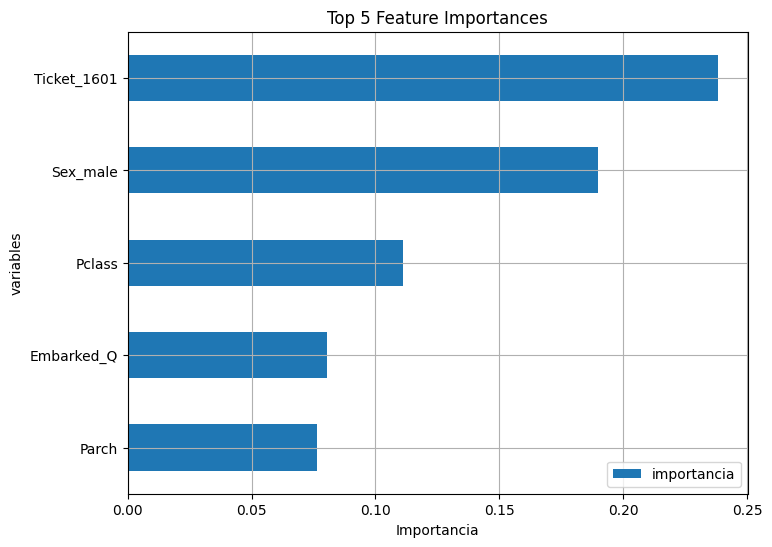

AUC XGBoost: 0.8015810276679841


In [173]:
xgboost(X_train, y_train, X_test, y_test)

### Shap values

#### - Para una predicción en el conjunto de prueba

[0]	validation_0-auc:0.64638


c:\Users\ppmel\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:49:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[100]	validation_0-auc:0.82688
[200]	validation_0-auc:0.80132
[300]	validation_0-auc:0.79499
[400]	validation_0-auc:0.79921
[500]	validation_0-auc:0.79592
[600]	validation_0-auc:0.79513
[700]	validation_0-auc:0.78959
[800]	validation_0-auc:0.79552
[900]	validation_0-auc:0.79921
[999]	validation_0-auc:0.80158
AUC XGBoost: 0.8016


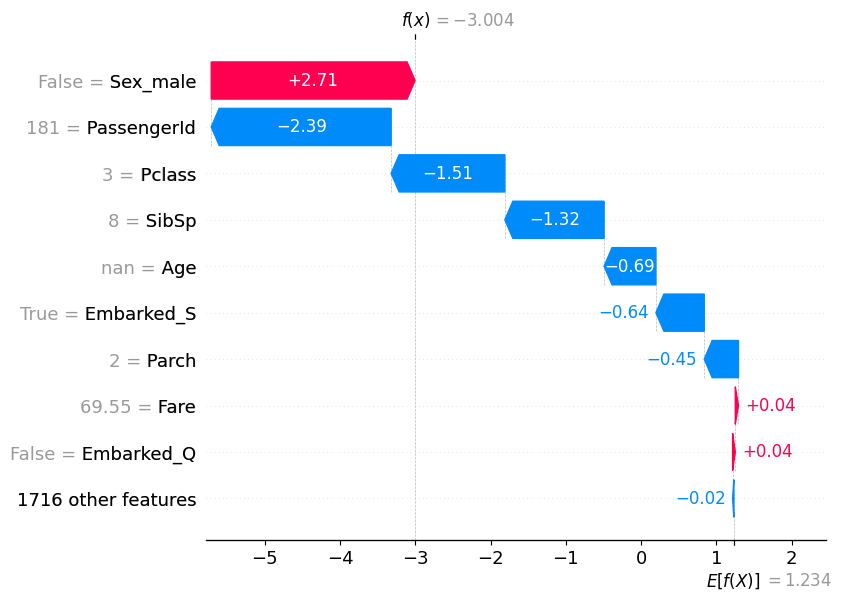

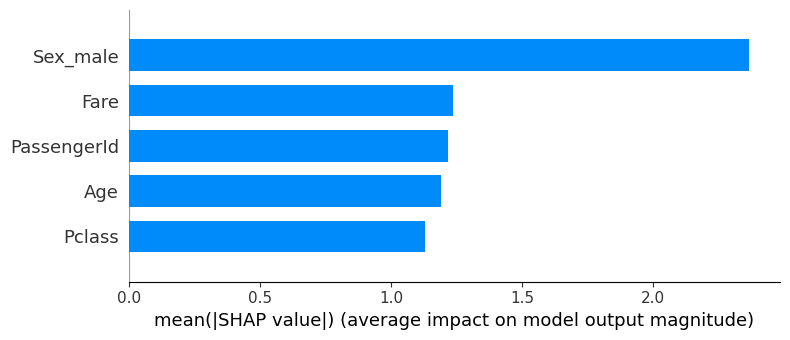

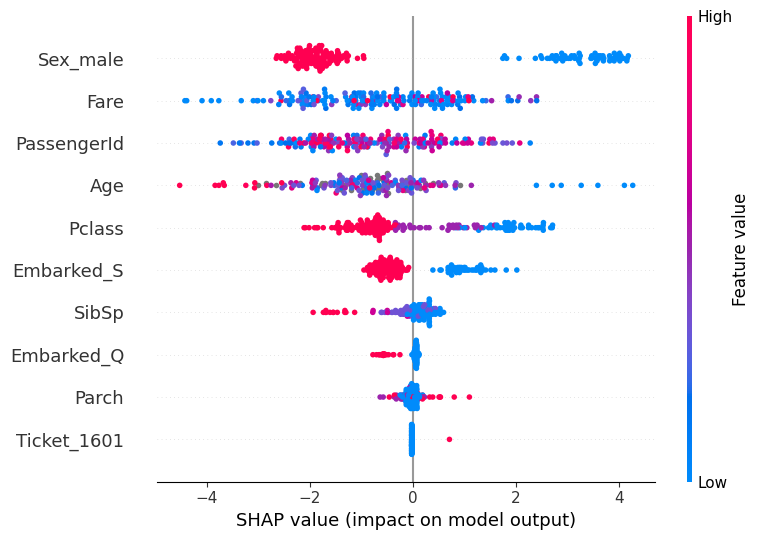

In [174]:
shapXGB(X_train, y_train, X_test, y_test)

## KMeans

#### Método del codo

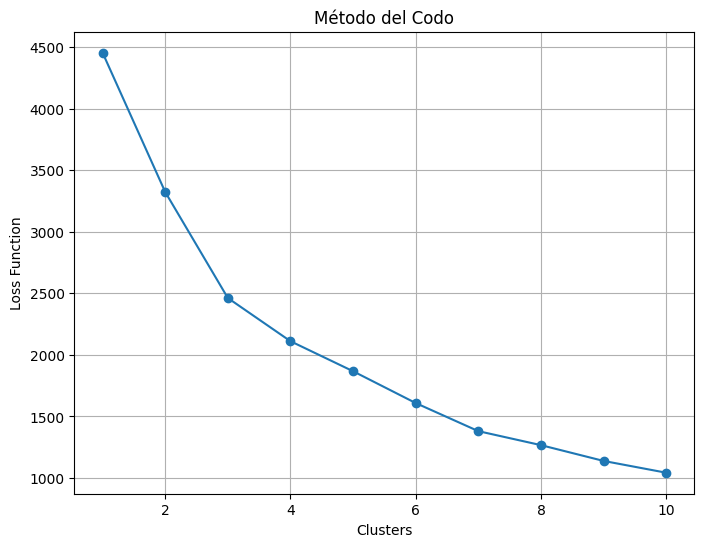

In [ ]:
columnas = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']  
kmeans(df, columnas, max_clusters=10)

### KMeans con 3 clusters

In [176]:

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=3, random_state=42)) 
])

pipeline.fit(df[columnas].values)

df['cluster'] = pipeline.predict(df[columnas].values)


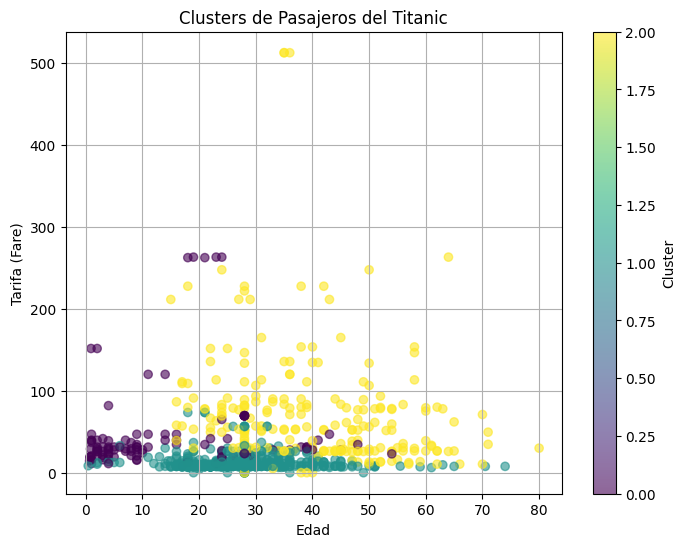

In [177]:
plt.figure(figsize=(8,6))
plt.scatter(df['Age'], df['Fare'], c=df['cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Edad')
plt.ylabel('Tarifa (Fare)')
plt.title('Clusters de Pasajeros del Titanic')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()
